# This notebook contains the final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Rana kukinoris</i> 
## Sample set:

3 locations . . . 

Banqiao_village - 11 samples  
Muyu_town - 8 samples  
Nanping_town - 46 samples  

Banqiao and Muyu are very close to eachother, about a 10 min walk, Nanping is about 200 km away. 


In [3]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [2]:
%load_ext rpy2.ipython

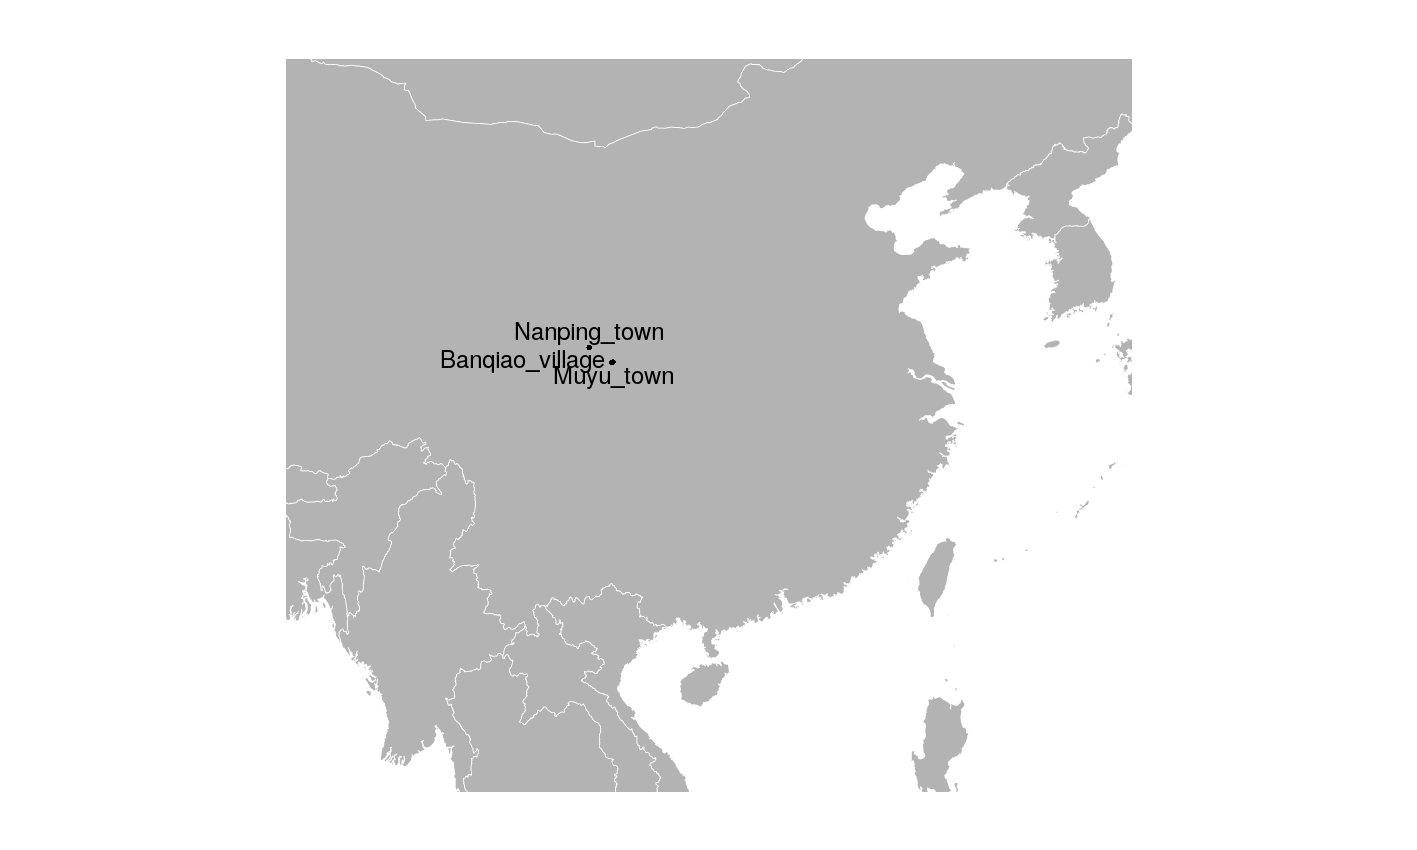

In [17]:
%%R -w 50 -h30 -u cm
library(maps)
library(mapplots)
library(mapdata)
library(calibrate)


map("worldHires", xlim=c(90,130), ylim=c(15, 45), col="gray70", fill=TRUE, border = "white")

Banqiao_village = c(32.6215, 105.34776)
Muyu_town = c(32.63548, 105.4028)
Nanping_town = c(33.23932, 104.24754)

points(105.34776, 32.6215, pch = 16, col = "black")
textxy(105.34776, 32.6215, "Banqiao_village", col = "black", cex = 2, pos = 2)
points(105.4028, 32.63548, pch = 16, col = "black")
textxy(105.4028, 32.63548, "Muyu_town", col = "black", cex = 2, pos = 1)
points(104.24754, 33.23932, pch = 16, col = "black")
textxy(104.24754, 33.23932, "Nanping_town", col = "black", cex = 2, pos = 3)

So, I will do the usual PCA, i imagine Nanping will come out separately from the other two. 

I will then look for SL markers in all samples. Then In Nanping separately on its own. Then in Muyu and Banqiao pooled. These populations have too few samples to be useful on their own, so I will probably not look into that. 

<b> relaxed populations command </b>

populations -b1 -M popmap.txt -P ./ -r 0.5 -p 1 --vcf -t 12 > Populations_relaxed.log 2>&1 & 

Running populations like this means that a locus has to be present in at least half the samples in at least 1 sex. We will have to be more strict with the final dataset. 

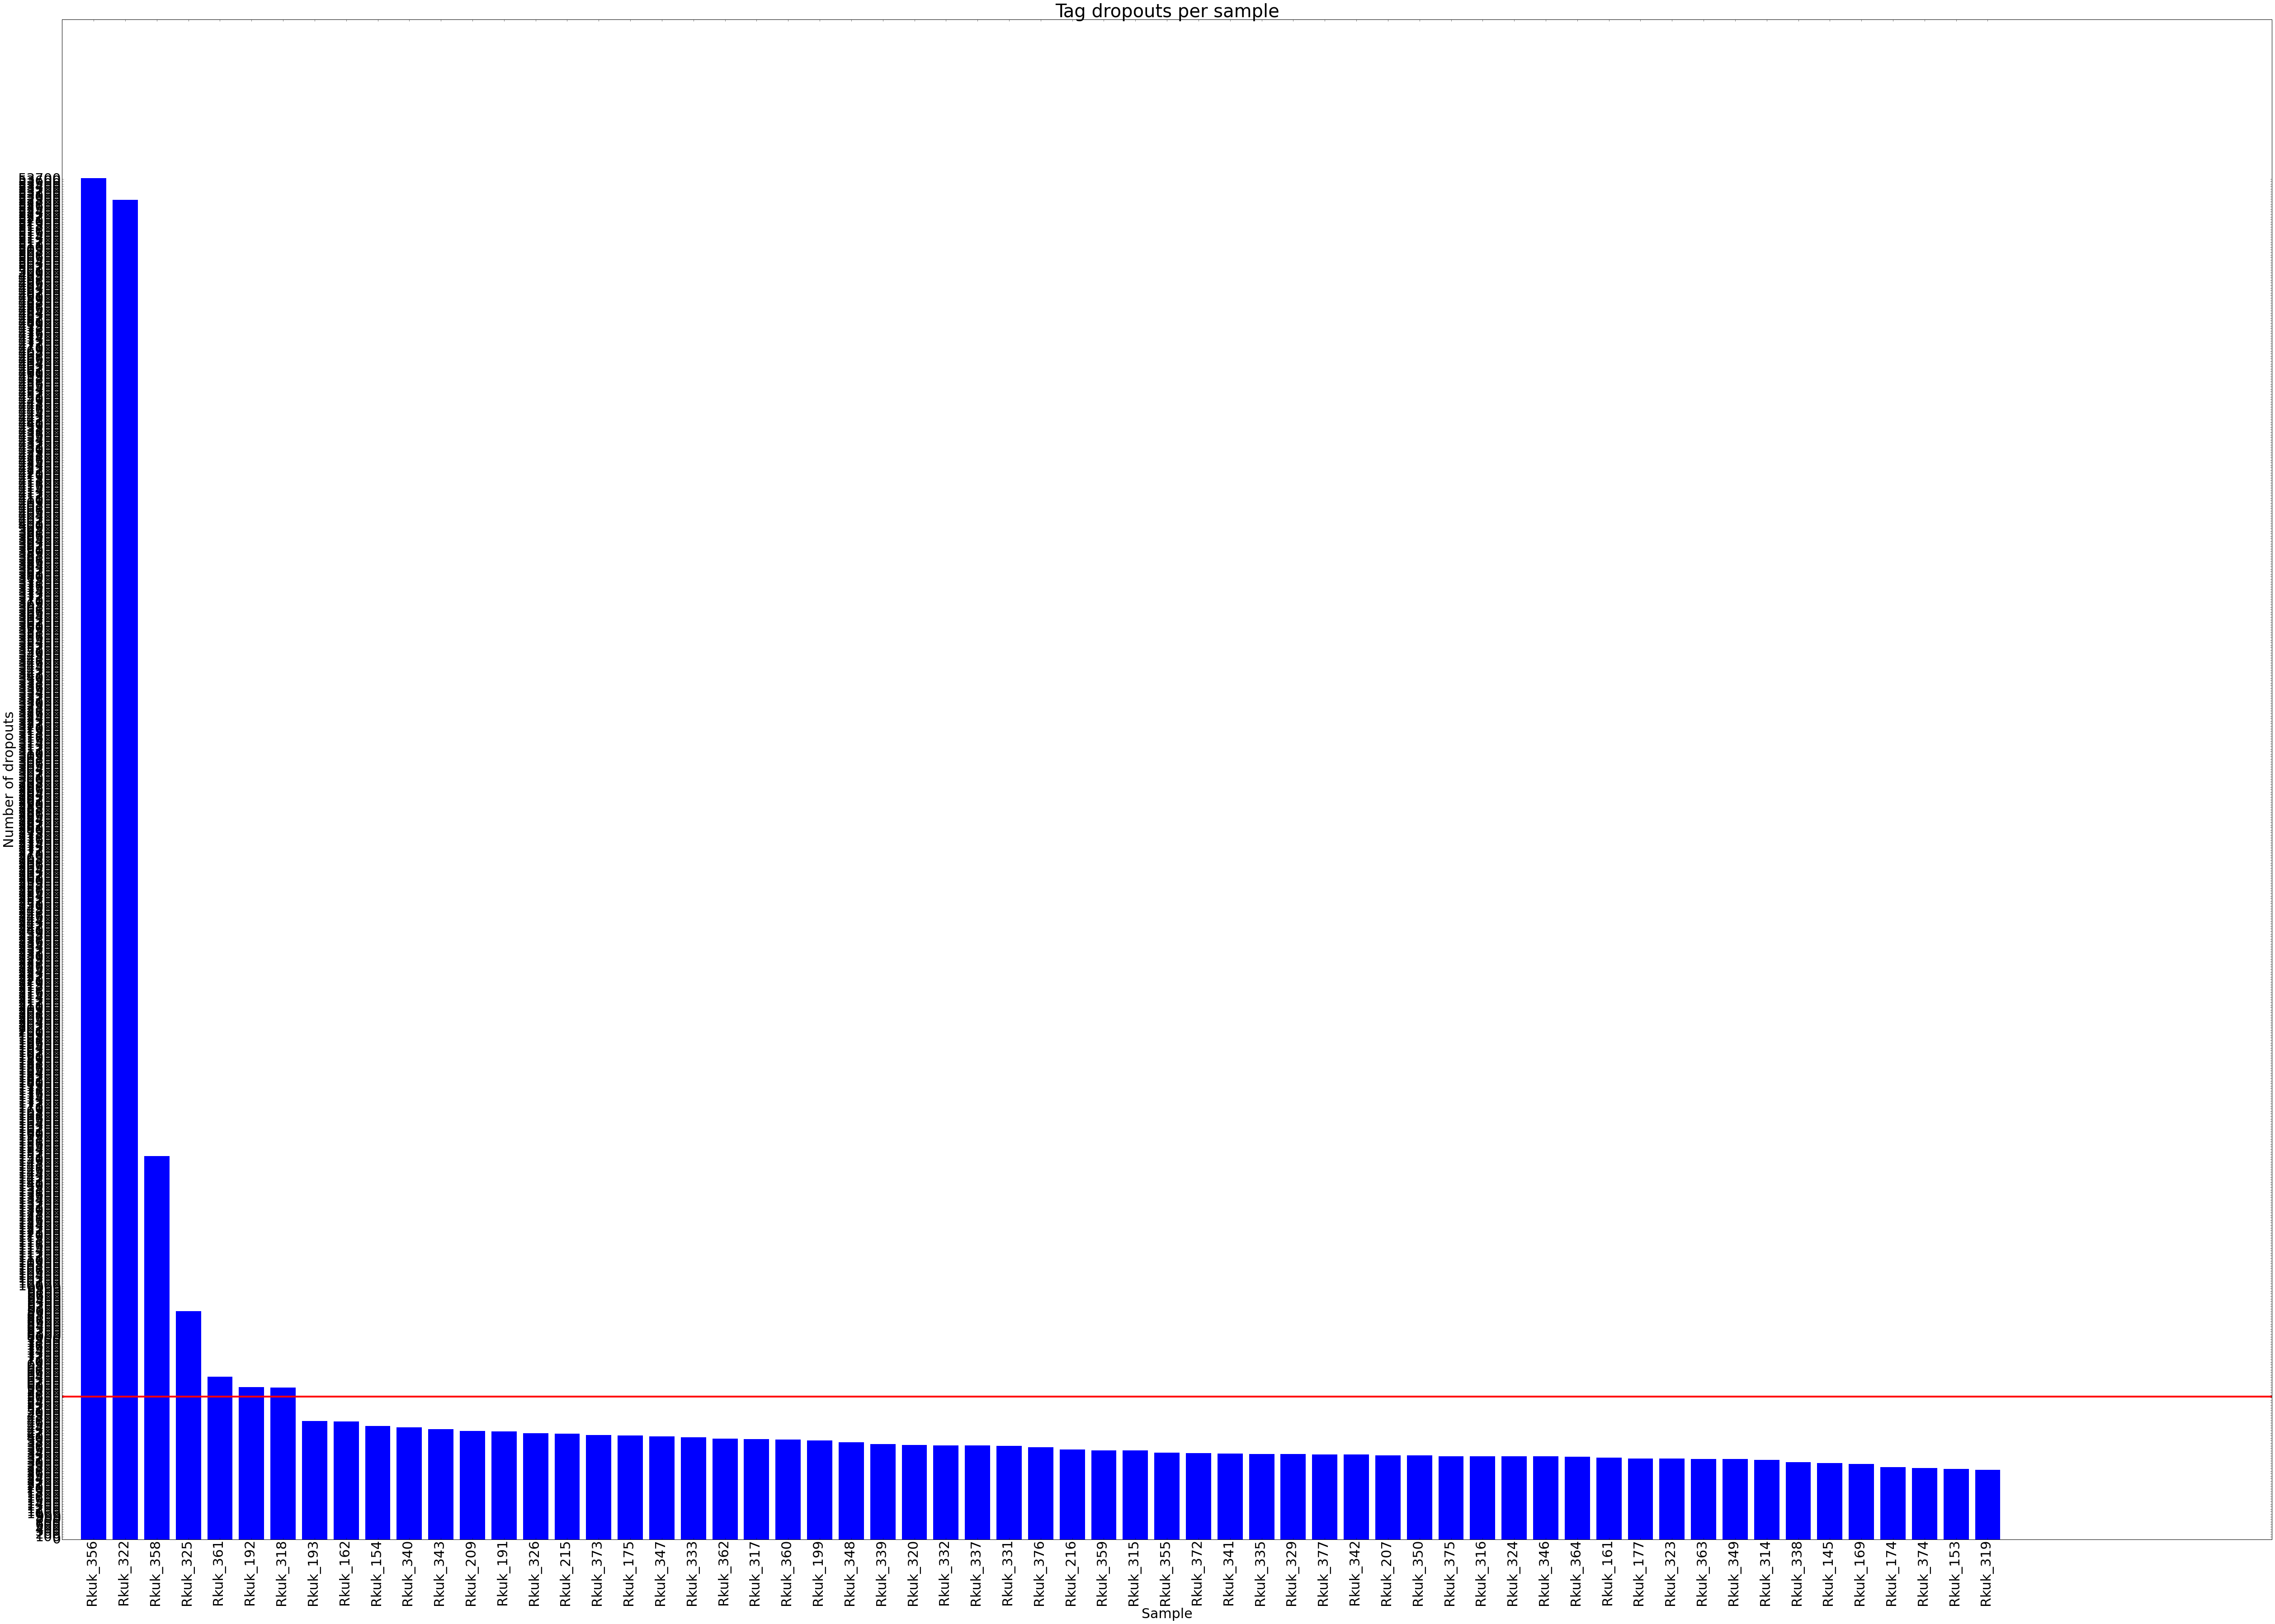

Outputs written to:
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_all//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_all//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_all//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_all//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_all//blacklist.txt


In [19]:
wd = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_all/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

The bad samples are all in Nanping population, so I can take them out without loosing power in the smaller pops.

Removed :  
- Rkuk_350  
- Rkuk_322  
- Rkuk_358  
- Rkuk_ 325

Doing so kept an extra 16,000 loci!

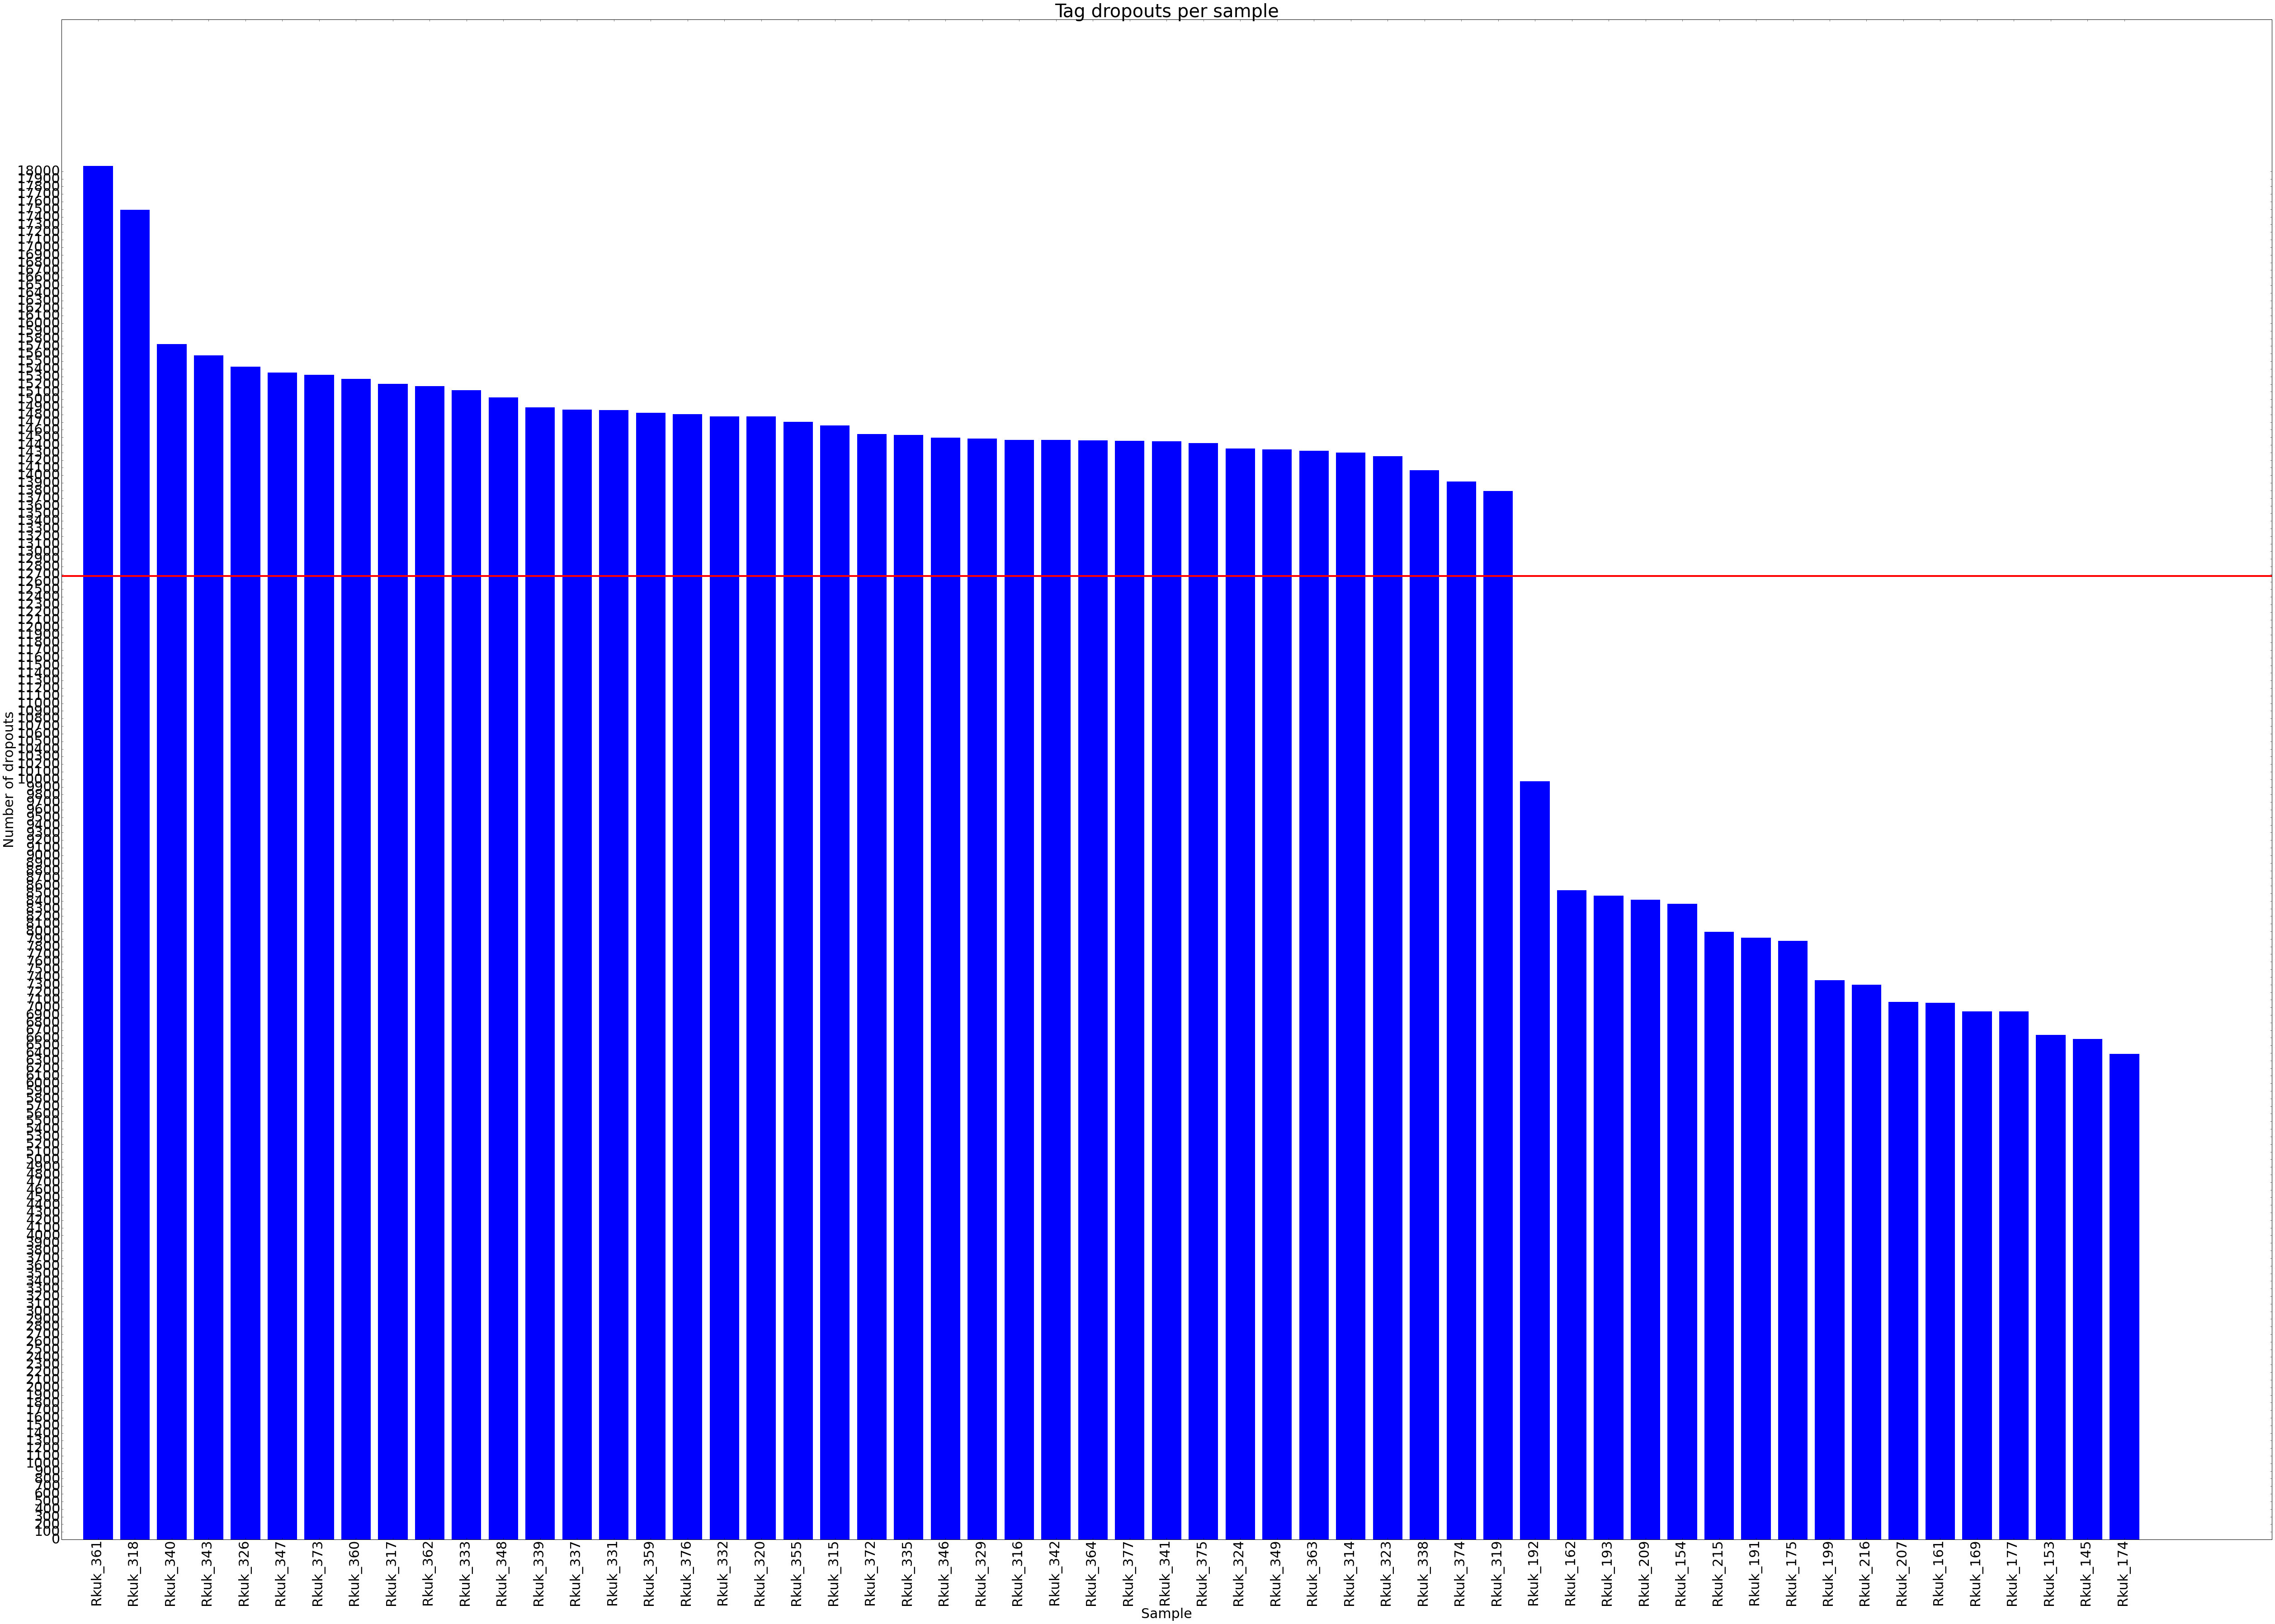

Outputs written to:
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//blacklist.txt


In [29]:
wd = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

### Now run a PCA to look at the structure in the data . . . 

In [30]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//batch_1_altered_adegenet_plink-temporary.fam
written.
67005 variants loaded from .bim file.
56 people (0 males, 0 females, 56

In [25]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



In [27]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

sexes <- read.delim("popmap_kept.txt", header = F)

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R_kukinoris pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 


Error in grDevices::pdf(..., version = version) : 
  failed to load default encoding


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in grDevices::pdf(..., version = version) : 
  failed to load default encoding

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: In grDevices::pdf(..., version = version) :
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  failed to load encoding file 'ISOLatin1.enc'

  warnings.warn(x, RRuntimeWarning)


Structure is pretty much as expected, the Nanping population comes out on its own, although there is a bit of variation within this pop, a few samples are outliers to the rest, so we'll see if this makes a difference later on. 

The other two pops are then separated on PC3, so pretty close, but still distinct from eachother. 

In [38]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 67005
Number of samples = 56
Number of loci with too few samples = 10184
Number of loci with low MAF = 24023
Number of loci with enough data = 32797
Number of putative X linked snps = 30
Number of putative X linked tags = 30
Number of putative Z linked markers = 13
Number of putative Z linked tags = 13


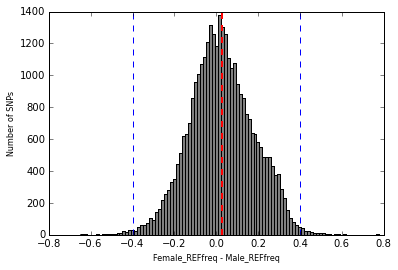


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 67005
Number of samples = 56
Number of loci with too few samples = 13988
Number of loci with low MAF = 20219
Number of loci with enough data = 32797
Number of putative X linked snps = 17
Number of putative X linked tags = 17
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 30
Number of males: 26
Number of Putative Y linked tags: 2
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rkukinoris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 46
Final number of ZW tags = 14


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


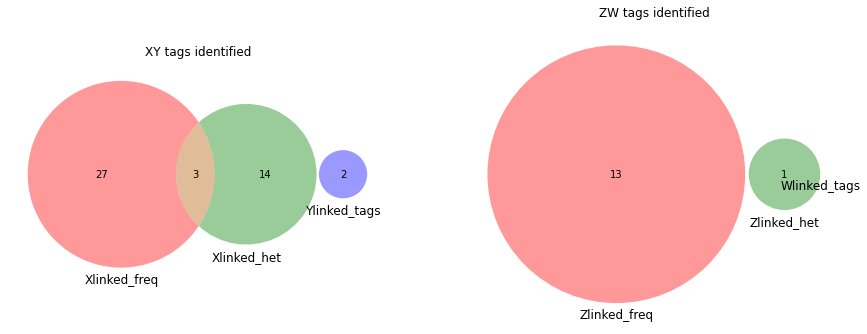

In [39]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### Nanping only

In [46]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 53986
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 19417
Number of loci with enough data = 34568
Number of putative X linked snps = 157
Number of putative X linked tags = 157
Number of putative Z linked markers = 23
Number of putative Z linked tags = 23


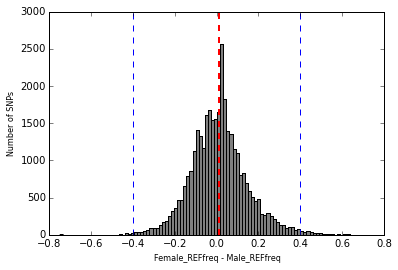


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 53986
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 19417
Number of loci with enough data = 34568
Number of putative X linked snps = 237
Number of putative X linked tags = 237
Number of putative Z linked markers = 15
Number of putative Z linked tags = 15

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 25
Number of males: 14
Number of Putative Y linked tags: 12
Number of Putative W linked tags: 7

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rkukinoris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 333
Final number of ZW tags = 45


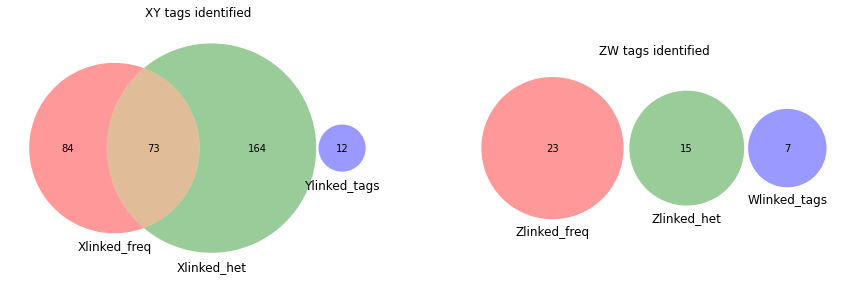

In [47]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")


In [49]:
vcf_path = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [50]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only//XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only//XY_linked_snps_freq_het_altered_adegenet-temporary.fam
written.
321 variants loaded from .bim

In [ ]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Nanping_only/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_info", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 


In [51]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R kukinoris Nanping only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use


Error in Sex_sorter(pca2, sexes, c(1, 2), Title = "R kukinoris Nanping only",  : 
  object 'pca2' not found


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in Sex_sorter(pca2, sexes, c(1, 2), Title = "R kukinoris Nanping only",  : 
  object 'pca2' not found

  warnings.warn(x, RRuntimeWarning)


### So there are a couple of conflicts between the genetic signal and the morpho male femal assignments:

Rkuk_375 - called female but genetically male
Rkuk_372 - called male but genetically female
Rkuk_362 - called male but genetically female

So I will run populations again, correcting these. And then re-do the tests for SL loci. . . see below. 


Number of tags =  48475
Average tag coverage 16.2808495969 (+- 10.122831812 )


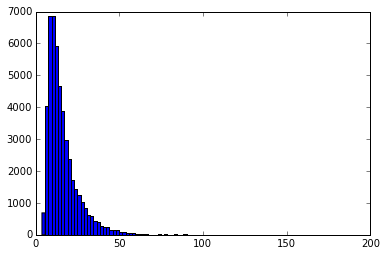

In [2]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [52]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 48475
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 17877
Number of loci with enough data = 30597
Number of putative X linked snps = 247
Number of putative X linked tags = 247
Number of putative Z linked markers = 50
Number of putative Z linked tags = 50


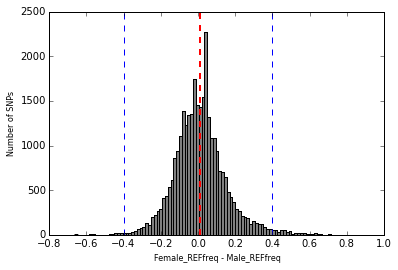


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 48475
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 17877
Number of loci with enough data = 30597
Number of putative X linked snps = 374
Number of putative X linked tags = 374
Number of putative Z linked markers = 22
Number of putative Z linked tags = 22

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 25
Number of males: 13
Number of Putative Y linked tags: 314
Number of Putative W linked tags: 21

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rkukinoris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 762
Final number of ZW tags = 90


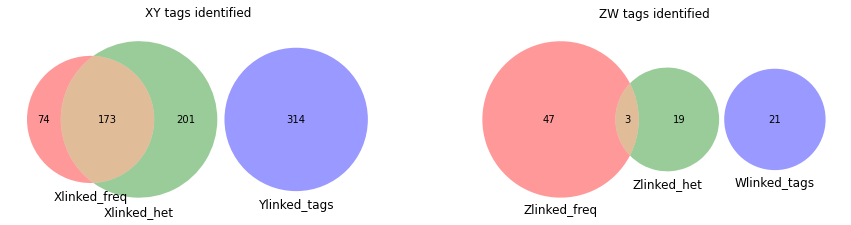

In [53]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

## So this is now a beautiful dataset! I could be more strict with these filters too . . . 

In [2]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 48475
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 17877
Number of loci with enough data = 30597
Number of putative X linked snps = 124
Number of putative X linked tags = 124
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5


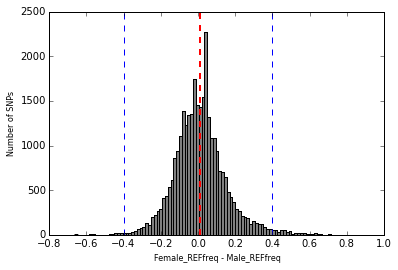


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 48475
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 17877
Number of loci with enough data = 30597
Number of putative X linked snps = 285
Number of putative X linked tags = 285
Number of putative Z linked markers = 10
Number of putative Z linked tags = 10

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 25
Number of males: 13
Number of Putative Y linked tags: 85
Number of Putative W linked tags: 2

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rkukinoris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 393
Final number of ZW tags = 15


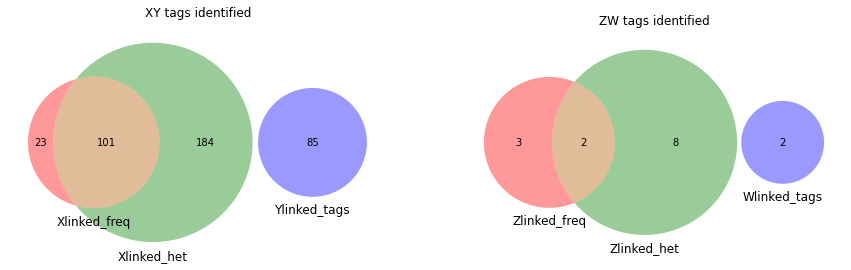

In [3]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### MUYU_BANQIAO


Number of tags =  40076
Average tag coverage 16.1993080794 (+- 9.90196070377 )


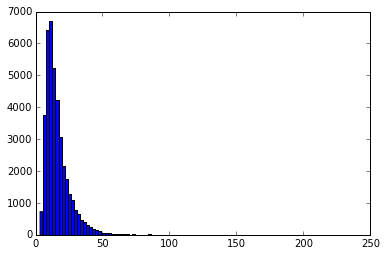

In [1]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_MUYU_BANQIAO/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [3]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_MUYU_BANQIAO/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_MUYU_BANQIAO//Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 40076
Number of samples = 17
Number of loci with too few samples = 0
Number of loci with low MAF = 10014
Number of loci with enough data = 30061
Number of putative X linked snps = 322
Number of putative X linked tags = 322
Number of putative Z linked markers = 224
Number of putative Z linked tags = 224


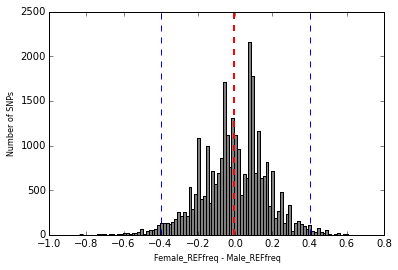


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 40076
Number of samples = 17
Number of loci with too few samples = 0
Number of loci with low MAF = 10014
Number of loci with enough data = 30061
Number of putative X linked snps = 167
Number of putative X linked tags = 167
Number of putative Z linked markers = 316
Number of putative Z linked tags = 316

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 5
Number of males: 12
Number of Putative Y linked tags: 534
Number of Putative W linked tags: 24

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rkukinoris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 972
Final number of ZW tags = 533


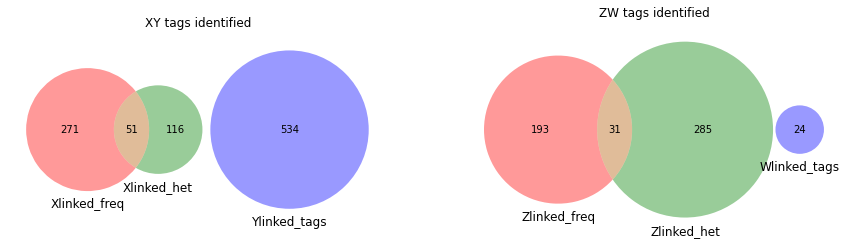

In [4]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So it looks like the MUYU_BANQIAO pool is not very useful. 

### BUT - I can look to see which of the sex linked loci in Nanping are sex linked in these populations though.

In [58]:
vcf_path = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "Nanping_XY_linked_snps_freq_het.vcf")

In [60]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/Nanping_XY_linked_snps_freq_het.vcf > $wd/Nanping_XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Nanping_XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/Nanping_XY_linked_snps_freq_het_altered_adegenet 

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Nanping_XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Nanping_XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Nanping_XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Nanping_XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Nanping_XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept//Nanping_XY_linked_snps_freq_h

In [4]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Nanping_XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


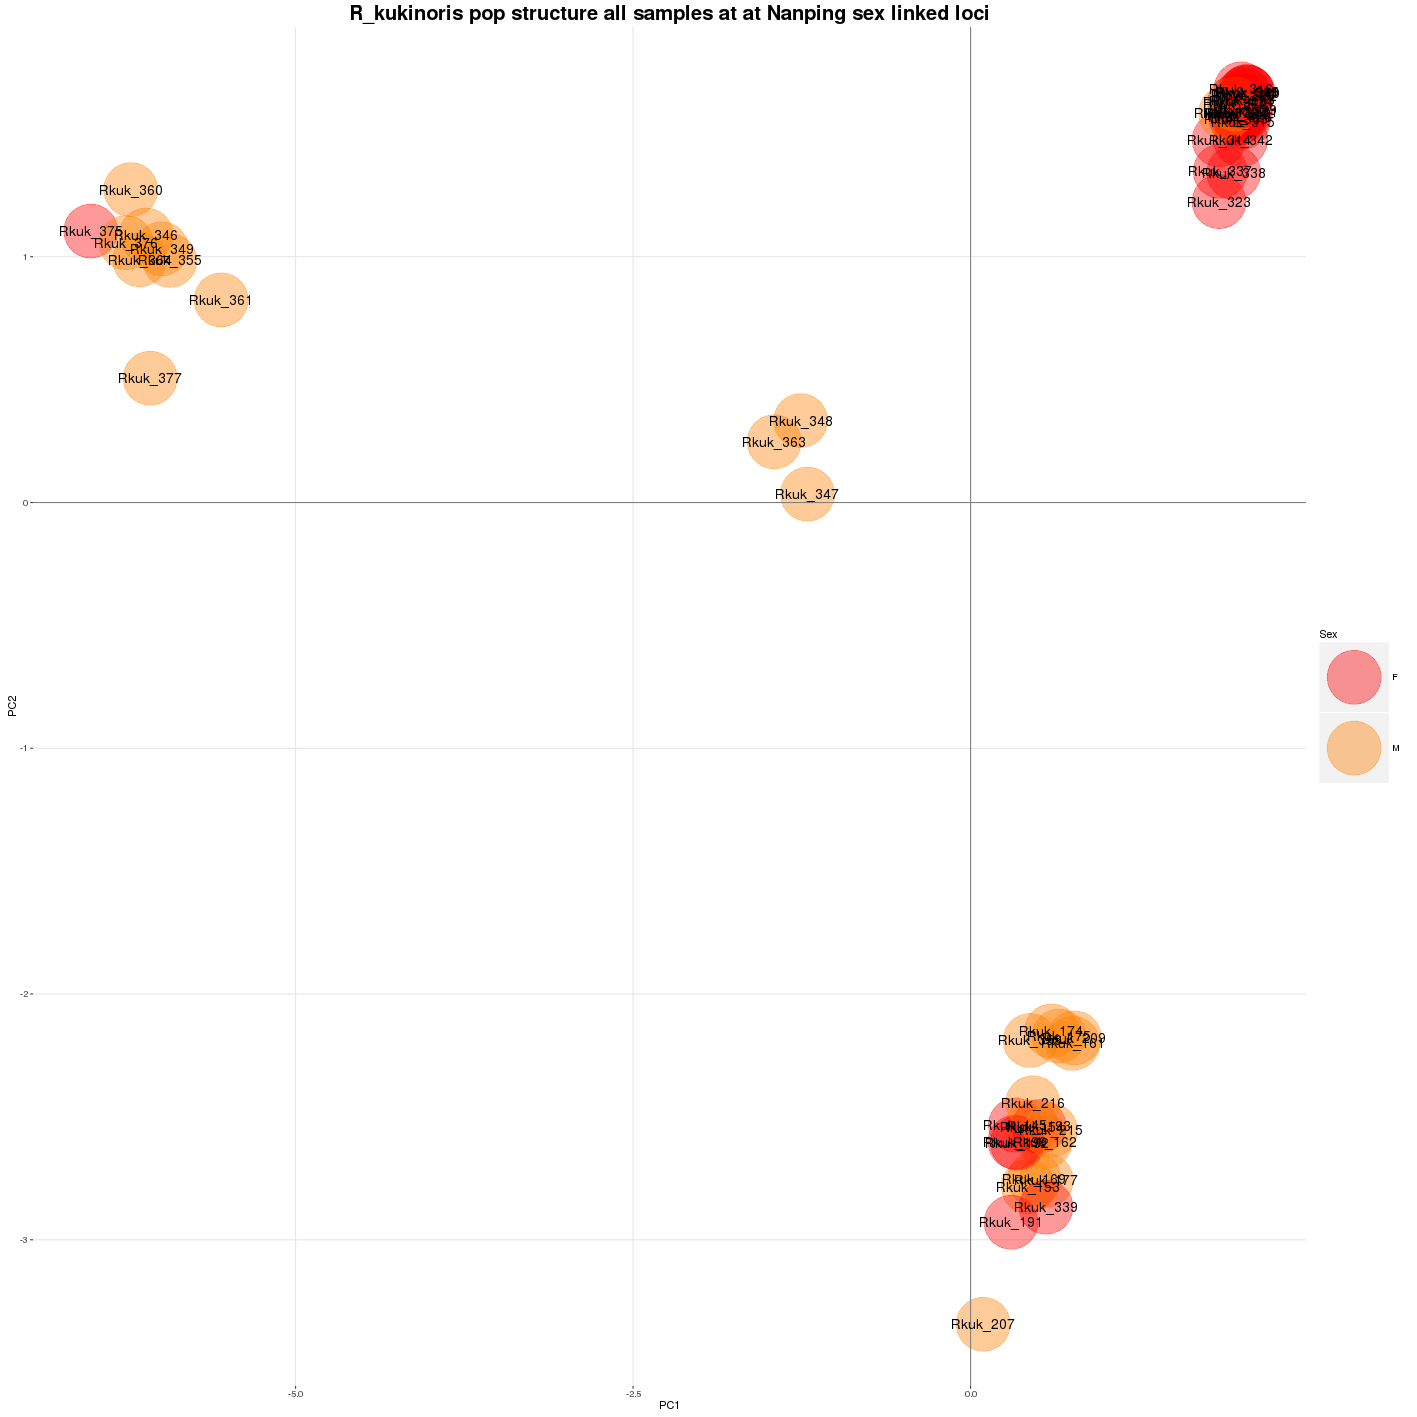

In [5]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R_kukinoris pop structure all samples at at Nanping sex linked loci", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

### So this is pretty messy, it looks like there could be a few misassignments, but also that the Nanping loci aren't informative in another population. need to look into this a bit more!

In [62]:
%%bash
sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/Nanping_XY_linked_snps_freq_het_altered_adegenet.raw  /home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/Nanping_XY_linked_heatmap_input


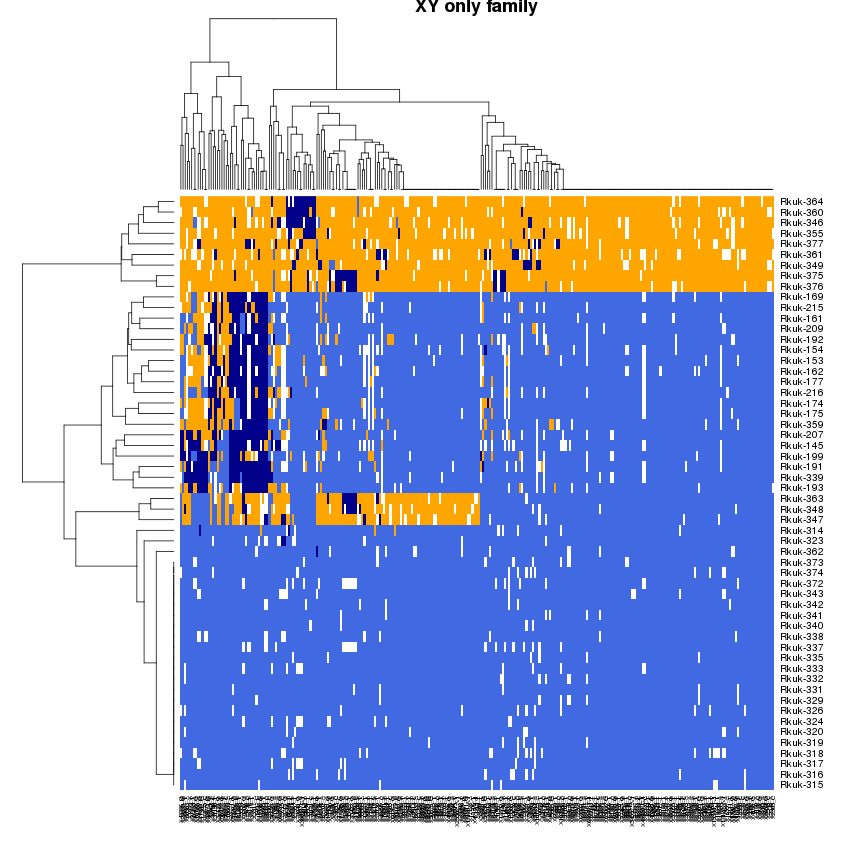

In [63]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_kept/Nanping_XY_linked_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "XY only family")



So, some bits are a bit messy, but basically the group at the top is the majority of Nanping males. The second group of heterozygosity are also nanping males, but with a second haplotype it seems. So removing these is likely to improve efficiency for finding sex linked markers even more if wanted.

The males from the other populations are included in the messy bit, along with the females. The males and females in these pops are generally split apart, so some of the sex linked markers in Nanping are indeed sex linked in the other pops, but not many. 


### SUMMARY

393 sex linked tags in the Nanping population!! Some of which are sex linked in the other two populations, but this data subset is not great, not enough males and females from the same haplotype. But when the better genome comes along perhaps I can do a more indepth analyses of this.

So all in all a really nice dataset, showing these multilpe haplotype systems are really common!!

## Manual mapping

In [7]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa"
Rtemp_db = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2-blastn-db"

Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-5
Eval_threshold = 1e-20
Window = 8000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_kukinoris/"
prefix = "R_kuk"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "R_kukinoris_Nanping.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rtemp_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_blast_chunks)


### Rtemp chunks to Nanorana

print "\n##  Mapping Rtemp chunks Nanorana  ##\n"

tags_Rtemp_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_blast_chunks, db=Nanorana_db, outfmt=5, out=tags_Rtemp_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Rtemp_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Rtemp_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Rtemp_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Rtemp_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 32
Number of unique alingments kept: 62
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa . . . 
94 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_kukinoris//blast_8000_chunks.fa

##  Mapping Rtemp chunks Nanorana  ##

Number of multi-alingments kept: 47
Number of unique alingments kept: 1
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
44 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_kukinoris//blast_8000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 10
Number of unique alingments kept: 9
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapp

## Checking the coverage of the ZW-like loci in the Nanping population.



In [5]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/Populations_Nanping_kept_altered/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 48475
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 17877
Number of loci with enough data = 30597
Number of putative X linked snps = 124
Number of putative X linked tags = 124
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5


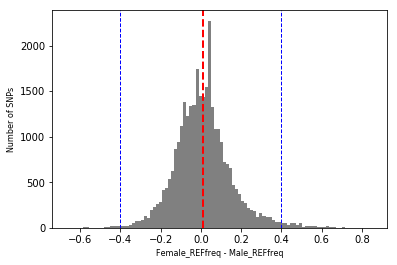


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 48475
Number of samples = 38
Number of loci with too few samples = 0
Number of loci with low MAF = 17877
Number of loci with enough data = 30597
Number of putative X linked snps = 285
Number of putative X linked tags = 285
Number of putative Z linked markers = 10
Number of putative Z linked tags = 10

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 25
Number of males: 13
Number of Putative Y linked tags: 85
Number of Putative W linked tags: 2

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rkukunoris/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 393
Final number of ZW tags = 15


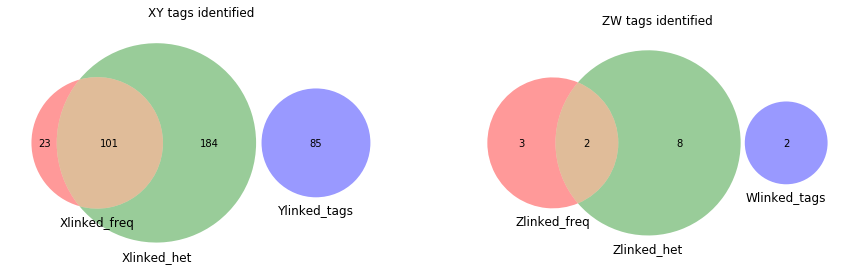

In [6]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [7]:
## get just catalof IDs.
ZWs = [i.split("_")[0] for i in ZWset]
XYs = [i.split("_")[0] for i in XYset]

In [11]:
import vcf

myvcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf.altered", 'r'))

ZW_records = {}
XY_records = {}

for record in myvcf:
    if record.ID in ZWs:
        ZW_records[record.ID] = record
        print "ZW", record
    elif record.ID in XYs:
        XY_records[record.ID] = record
        print "XY", record

XY Record(CHROM=un, POS=19360, REF=T, ALT=[C])
XY Record(CHROM=un, POS=19377, REF=A, ALT=[C])
XY Record(CHROM=un, POS=19396, REF=C, ALT=[T])
XY Record(CHROM=un, POS=106021, REF=T, ALT=[A])
XY Record(CHROM=un, POS=126270, REF=T, ALT=[A])
XY Record(CHROM=un, POS=182104, REF=T, ALT=[G])
XY Record(CHROM=un, POS=182105, REF=G, ALT=[T])
XY Record(CHROM=un, POS=182188, REF=G, ALT=[A])
XY Record(CHROM=un, POS=219902, REF=G, ALT=[A])
XY Record(CHROM=un, POS=219929, REF=T, ALT=[C])
XY Record(CHROM=un, POS=236990, REF=G, ALT=[A])
XY Record(CHROM=un, POS=236991, REF=G, ALT=[C])
XY Record(CHROM=un, POS=242108, REF=A, ALT=[G])
XY Record(CHROM=un, POS=242114, REF=G, ALT=[A])
XY Record(CHROM=un, POS=242145, REF=G, ALT=[A])
XY Record(CHROM=un, POS=251535, REF=G, ALT=[A])
XY Record(CHROM=un, POS=251559, REF=G, ALT=[A])
XY Record(CHROM=un, POS=254972, REF=C, ALT=[T])
XY Record(CHROM=un, POS=255003, REF=G, ALT=[A])
XY Record(CHROM=un, POS=275196, REF=C, ALT=[T])
XY Record(CHROM=un, POS=275231, REF=A, ALT=

In [12]:
## Now get male and female data

sex_info = open("/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/Populations_Nanping_kept_altered/Sex_ID_info.txt", 'r').readlines()

sex_info_dict = {}

for line in sex_info:
    sample = line.split()[0]
    sex = line.split()[1]
    
    sex_info_dict[sample] = sex
        

In [52]:
## So now I can go get the coverages for males and females
import numpy as np

myvcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf.altered", 'r'))

## ZW first
ZWmale_covs = []
ZWfemale_covs = []

for record in myvcf:
    if record.ID in ZWs:
        Male_record_list = []
        Female_record_list = []
        
        for sample in record.samples:
            if sex_info_dict[sample.sample] == "M":
                if sample["DP"] > 0:
                    Male_record_list.append(sample["DP"])
            elif sex_info_dict[sample.sample] == "F":
                if sample["DP"] > 0:
                    Female_record_list.append(sample["DP"])
        
        male_mean = np.mean(Male_record_list)
        female_mean = np.mean(Female_record_list)
        
        ZWmale_covs.append(male_mean)
        ZWfemale_covs.append(female_mean)
    

## XY 

myvcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Rkukunoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf.altered", 'r'))

XYmale_covs = []
XYfemale_covs = []

for record in myvcf:
    if record.ID in XYs:
        Male_record_list = []
        Female_record_list = []
        
        for sample in record.samples:
            if sex_info_dict[sample.sample] == "M":
                if sample["DP"] > 0:
                    Male_record_list.append(sample["DP"])
            elif sex_info_dict[sample.sample] == "F":
                if sample["DP"] > 0:
                    Female_record_list.append(sample["DP"])
        
        male_mean = np.mean(Male_record_list)
        female_mean = np.mean(Female_record_list)
        
        XYmale_covs.append(male_mean)
        XYfemale_covs.append(female_mean)

print "ZW males", np.mean(ZWmale_covs)
print "ZW females", np.mean(ZWfemale_covs)

print "XY males", np.mean(XYmale_covs)
print "XY females", np.mean(XYfemale_covs)



ZW males 18.0560828061
ZW females 21.8449406525
XY males 17.9860316521
XY females 16.9788850029


ZW-like compared between males and females
t = -2.34247646722
p = 0.0484381281897
df = 40


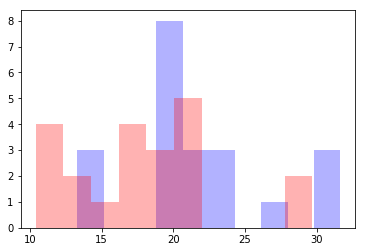

In [53]:
## Quick t-test on this
from scipy import stats

print "ZW-like compared between males and females"
t2, p2 = stats.ttest_ind(ZWmale_covs, ZWfemale_covs)
print("t = " + str(t2))
print("p = " + str(2*p2))
print "df = %s" % (len(ZWmale_covs)+len(ZWfemale_covs)-2)

from matplotlib import pyplot as plt

plt.hist(ZWfemale_covs, color = "blue", alpha = 0.3)
plt.hist(ZWmale_covs, color = "red", alpha = 0.3)
plt.show()

XY-like compared between males and females
t = 1.95497920144
p = 0.101719922067
df = 1014


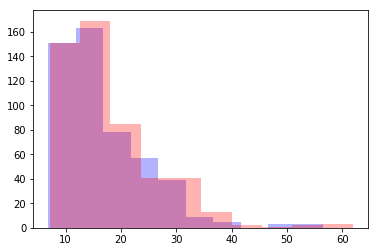

In [54]:
print "XY-like compared between males and females"
t2, p2 = stats.ttest_ind(XYmale_covs, XYfemale_covs)
print("t = " + str(t2))
print("p = " + str(2*p2))
print "df = %s" % (len(XYmale_covs)+len(XYfemale_covs)-2)

plt.hist(XYfemale_covs, color = "blue", alpha = 0.3)
plt.hist(XYmale_covs, color = "red", alpha = 0.3)
plt.show()